In [34]:
import pickle
import pandas as pd

from data.make_dataset import load_data
from features.build_features import multi_ordinal_encoder, get_best_correlation_columns, choose_columns

In [35]:
decision_tree_model = pickle.load(open('models/models/decision_tree_regressor_model.sav', 'rb'))
random_forest_model = pickle.load(open('models/models/random_forest_regressor_model.sav', 'rb'))
ada_boost_model = pickle.load(open('models/models/ada_boost_regressor_model.sav', 'rb'))
xgboost_model = pickle.load(open('models/models/xgboost_regressor_model.sav', 'rb'))

c:\Users\MatiasMaiorano\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\MatiasMaiorano\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\MatiasMaiorano\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator AdaBoostRegressor from version 1.0.2 when using version 1.1.1. This might lead to breaking 

In [36]:
from sklearn.preprocessing import OrdinalEncoder

In [37]:
df = load_data('../data/raw/train.csv')
oe = OrdinalEncoder()
df = multi_ordinal_encoder(df, oe)

best_columns = get_best_correlation_columns(df, 'SalePrice', .5)
X_test = choose_columns(df, best_columns)
y_test = choose_columns(df, ['SalePrice'])

In [38]:
predict_decision_tree = decision_tree_model.predict(X_test)
predict_random_forest = random_forest_model.predict(X_test)
predict_ada_boost = ada_boost_model.predict(X_test)
predict_xgboost = xgboost_model.predict(X_test)

In [68]:
df_ris = pd.DataFrame(columns=['y_true'])
df_ris.y_true = y_test.values.squeeze()
df_ris['predict_decision_tree'] = predict_decision_tree
df_ris['predict_random_forest'] = predict_random_forest
df_ris['predict_ada_boost'] = predict_ada_boost
df_ris['predict_xgboost'] = predict_xgboost
df_ris['error_decision_tree'] = round(df_ris['y_true'] - df_ris['predict_decision_tree'], 0)
df_ris['error_random_forest'] = round(df_ris['y_true'] - df_ris['predict_random_forest'], 0)
df_ris['error_ada_boost'] = round(df_ris['y_true'] - df_ris['predict_ada_boost'],0)
df_ris['error_xgboost'] = round(df_ris['y_true'] - df_ris['predict_xgboost'],0)
df_ris

,y_true,predict_decision_tree,predict_random_forest,predict_ada_boost,predict_xgboost,error_decision_tree,error_random_forest,error_ada_boost,error_xgboost
0,208500,189500.0,195021.4675,202762.806167,207833.015625,19000.0,13479.0,5737.0,667.0
1,181500,165000.0,168039.9225,157621.141026,179248.750000,16500.0,13460.0,23879.0,2251.0
2,223500,189500.0,211245.4675,207429.728682,220799.234375,34000.0,12255.0,16070.0,2701.0
3,140000,111250.0,173976.2175,179754.486811,139703.328125,28750.0,-33976.0,-39754.0,297.0
4,250000,262000.0,276499.4750,269375.195980,250897.546875,-12000.0,-26499.0,-19375.0,-898.0
...,...,...,...,...,...,...,...,...,...
1455,175000,175950.0,178194.9950,173822.851562,173729.609375,-950.0,-3195.0,1177.0,1270.0
1456,210000,239000.0,212841.0700,215953.126394,210353.343750,-29000.0,-2841.0,-5953.0,-353.0
1457,266500,263750.0,265100.9825,230742.149780,266509.187500,2750.0,1399.0,35758.0,-9.0
1458,142125,140000.0,134817.7150,133844.104167,140874.437500,2125.0,7307.0,8281.0,1251.0


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

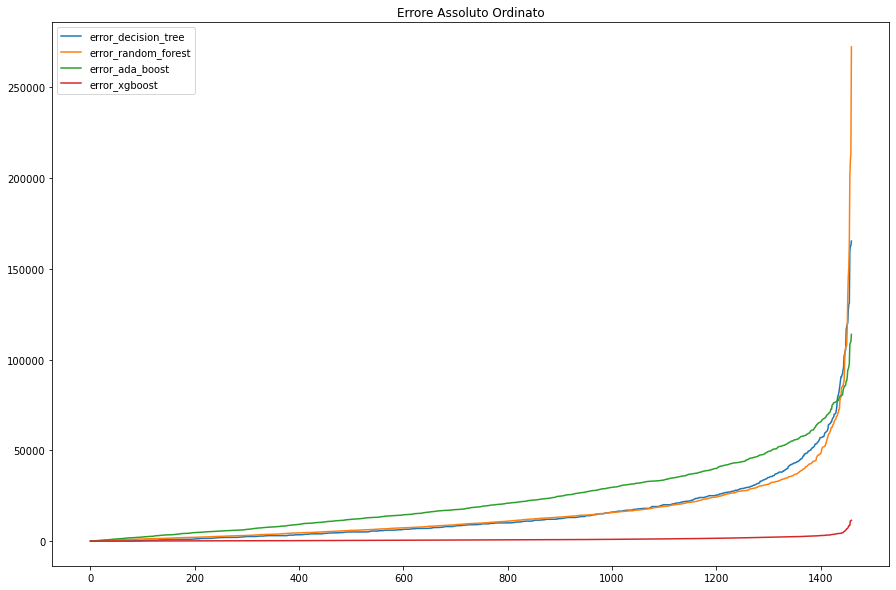

In [161]:
plt.figure(figsize=(15,10))
plt.title("Errore Assoluto Ordinato")
plt.plot(df_ris['error_decision_tree'].abs().sort_values().values.squeeze(), label="error_decision_tree")
plt.plot(df_ris['error_random_forest'].abs().sort_values().values.squeeze(), label="error_random_forest")
plt.plot(df_ris['error_ada_boost'].abs().sort_values().values.squeeze(), label="error_ada_boost")
plt.plot(df_ris['error_xgboost'].abs().sort_values().values.squeeze(), label="error_xgboost")
plt.legend()
plt.savefig('graph/errore_assoluto_ordinato.png')


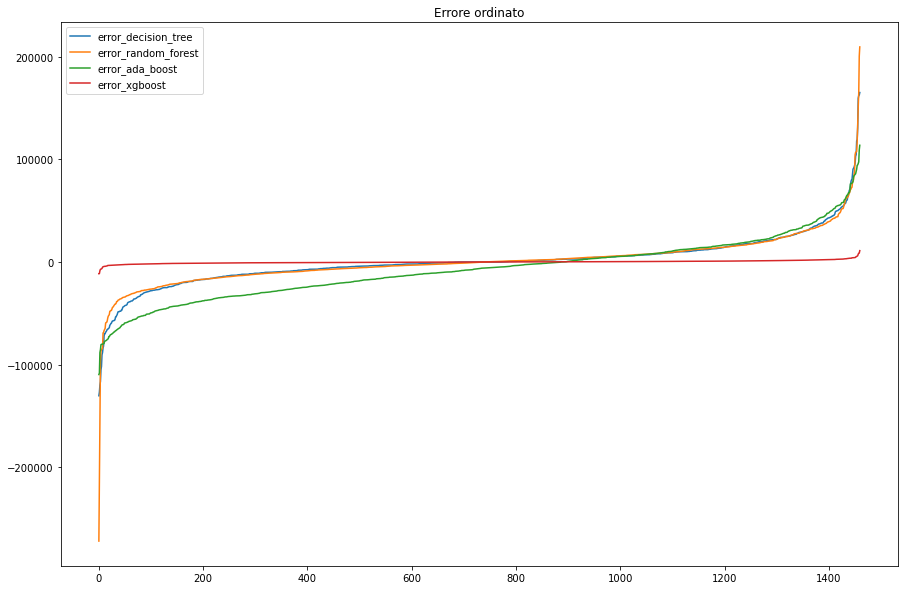

In [162]:
plt.figure(figsize=(15,10))
plt.title('Errore ordinato')
plt.plot(df_ris['error_decision_tree'].sort_values().values.squeeze(), label="error_decision_tree")
plt.plot(df_ris['error_random_forest'].sort_values().values.squeeze(), label="error_random_forest")
plt.plot(df_ris['error_ada_boost'].sort_values().values.squeeze(), label="error_ada_boost")
plt.plot(df_ris['error_xgboost'].sort_values().values.squeeze(), label="error_xgboost")
plt.legend()
plt.savefig('graph/errore_ordinato.png')

In [126]:
from sklearn.metrics import mean_absolute_error

mae_decision_tree = mean_absolute_error(df_ris['y_true'], df_ris['predict_decision_tree'])
mae_random_forest = mean_absolute_error(df_ris['y_true'], df_ris['predict_random_forest'])
mae_ada_boost = mean_absolute_error(df_ris['y_true'], df_ris['predict_ada_boost'])
mae_xgboost = mean_absolute_error(df_ris['y_true'], df_ris['predict_xgboost'])

In [128]:
mae_random_forest

15085.230263698631

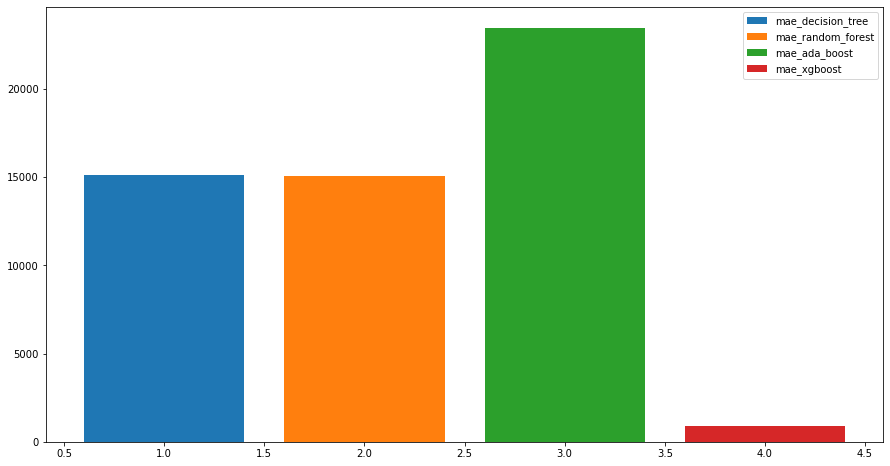

In [149]:
plt.title('Mean Absolute Error')
plt.figure(figsize=(15,8))
plt.bar(1,mae_decision_tree, label="mae_decision_tree")
plt.bar(2,mae_random_forest, label="mae_random_forest")
plt.bar(3,mae_ada_boost, label="mae_ada_boost")
plt.bar(4,mae_xgboost, label="mae_xgboost")
plt.legend()
plt.savefig('graph/mean_absolute_error.png')